---
word2vec
===

<img src="http://billsdata.net/wordpress/wp-content/uploads/2015/11/wikimap2.jpg" style="width: 400px;"/>

---
Pop Quiz
---
<br>
<details><summary>
Do computers prefer numbers or words?
</summary>
<br>
<br>
__Numbers__
<br>
<br>
word2vec is currently the best algorithm to map words (strings) to numbers (vectors of floats).
</details>

---
By The End Of This Notebook You Should Be Able To:
---

- Describe why word2vec is popular and powerful
- Explain how word2vec is a neural network
- Understand the common architectures of word2vec
- Apply word vectors to "do math" on words

----
Why is word2vec so popular?
----

1. Organizes word by semantic meaning.

2. Turns text into a numerical form that Deep Learning Nets and machine learning algorithms can in-turn use.

----
How does word2vec work?
----

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/John_Rupert_Firth.png/220px-John_Rupert_Firth.png" style="width: 400px;"/>

>“You shall know a word
>by the company it keeps”

> \- J. R. Firth 1957

---
Distributional Hypothesis
---

> Words that are used and occur in the same contexts tend to have similar meanings


### Example:


> ... government debt problems are turning into __banking__ crises...  

> ... Europe governments needs unified __banking__ regulation to replace the hodgepodge of debt regulations...

The words: _government_, _regulation_ and _debt_ probably represent some aspect of _banking_ since they frequently appear near by.

The words: _Pokeman_ and _tublar_ probably don't represent some aspect of _banking_ since they don't frequently appear near by.



----
How does word2vec model the Distributional Hypothesis?
---

word2Vec is a very simple neural network:
<img src="images/w2v_neural_net.png" style="width: 400px;"/>

Input = text corpus  
Output = vector for each word

----
word2vec as a compression algorithm
-----

<img src="images/w2v_neural_net.png" style="width: 400px;"/>

Note the bow-tie shape. That is is an __autoencoder__. 

Autoencoders compress sparse representations into dense representation. 

Learns the mapping that best preserves the structure of the original space.

---
Story time...
---

The man and woman meet each other ...

They become king and queen ...

They got old and stop talking to each other. Instead, they read books and magazines ...

In [7]:
corpus = """The man and woman meet each other ...
         They become king and queen ...
         They got old and stop talking to each other. Instead, they read books and magazines ...
         """

In [8]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [9]:
# Let's hand assign the words to vectors
important_words = ['queen', 'book', 'king', 'magazine', 'woman', 'man']

vectors = np.array([[0.1,   0.3],  # queen
                    [-0.5, -0.1],  # book
                    [0.2,   0.2],  # king
                    [-0.3, -0.2],  # magazine
                    [-0.5,  0.4],  # car
                    [-0.45, 0.3]]) # bike

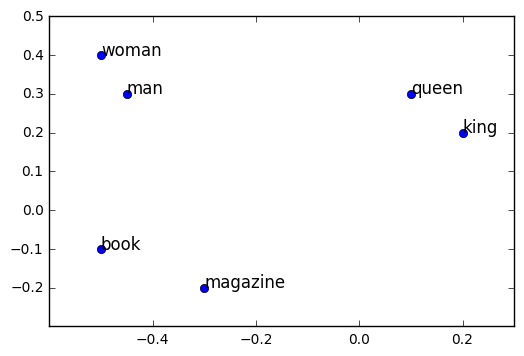

In [10]:
plt.plot(vectors[:,0], vectors[:,1], 'o')
plt.xlim(-0.6, 0.3)
plt.ylim(-0.3, 0.5)
for word, x, y in zip(important_words, vectors[:,0], vectors[:,1]):
    plt.annotate(word, (x, y), size=12)

---
Check for understanding
---
<br>
<details><summary>
How many dimensions are data represented in? 
</summary>
<br>
There are 2 dimensions. 
</details>

<br>
<details><summary>
How many dimensions would we need to represent for typical word vectors? 
</summary>
<br>
<br>
5
<br>
<br>
Typically you would use n-1 word vectors, a baseline word would be coded as all zeros.
</details>

In [11]:
# Encode each word using 1-hot encoding
{'queen': [0, 0, 0, 0, 0],
 'book': [0, 0, 0, 0, 1],
 'king': [0, 0, 0, 1, 0],
 'magazine': [0, 0, 1, 0, 0],
 'woman': [0, 1, 0, 0, 0],
 'man': [1, 0, 0, 0, 0],
}

{'book': [0, 0, 0, 0, 1],
 'king': [0, 0, 0, 1, 0],
 'magazine': [0, 0, 1, 0, 0],
 'man': [1, 0, 0, 0, 0],
 'queen': [0, 0, 0, 0, 0],
 'woman': [0, 1, 0, 0, 0]}

The 2 architectures of word2vec
----

1) “Continuous bag of words”: Predict a missing word in a sentence based on the surrounding context

2) “Skip-gram”: Each current word as an input to a log-linear classifier to predict words within a certain range before and after that current word

## Continuous bag of words (CBOW) architecture

<img src="images/cbow.png" style="width: 400px;"/>
Given the context (surronding words), predict the current word.

[Detailed explanation](http://alexminnaar.com/word2vec-tutorial-part-ii-the-continuous-bag-of-words-model.html)



## Skip-gram architecture (the inverse of CBOW)

<img src="images/skip-gram.png" style="width: 400px;"/>
Given the current word, predict the context (surrounding words).

---
Skip-gram example
---

>“Insurgents killed in ongoing fighting.”

Bi-grams = {insurgents killed, killed in, in ongoing, ongoing fighting}.  

2-skip-bi-grams = {insurgents killed, insurgents in, insurgents ongoing, killed in, killed ongoing, killed fighting, in ongoing, in fighting, ongoing fighting}.  

Tri-grams = {insurgents killed in, killed in ongoing, in ongoing fighting}.  

2-skip-tri-grams = {insurgents killed in, insurgents killed ongoing, insurgents killed fighting, insurgents in ongoing, insurgents in fighting, insurgents ongoing fighting, killed in ongoing, killed in fighting, killed ongoing fighting, in ongoing fighting}. 


----
CBOW vs. Skip-gram
----

CBOW is several times faster to train than the skip-gram and has slightly better accuracy for  frequent words.  

Skip-gram works well with a small amount of the training data and well represents rare words.

__Skip-gram tends to be the most common architecture.__

<br>
<br>
<br>

----